# Portfolio Part 4 - Analysis of  heart-disease (2024 S1)

**Name:** Hathaichanok Singjanusong


The dataset contain 1190 instances with 11 features and it were collected at one place to help advance research on machince learning. The purpose of this analysis is to find the most effective techniques for prediction and classification of heart disease by using the variance statistical and machine learning. Additionally, this analysis aims to determine the most correlate features which have a risk of heart disease relies on 'target'. 

|Column|Meaning|
|:-----:|:-----:|
|chest pain type| 4 groups of pain or discomfort in any area of your chest.|
|resting bp s| number of heart beats per minute when you are at rest.|
|cholesterol|A fat-like substance made in the liver, and found in the blood and in all cells of the body.|
|fasting blood sugar|common blood test to diagnose prediabetes, diabetes or gestational diabetes|
|resting ecg|a non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks.|
|max heart rate	|the upper limit of what your heart and blood vessel system, called the cardiovascular system, can handle during physical activity|
|exercise angina| pain in the chest that comes on with exercise, stress, or other things that make the heart work harder.|
|oldpeak|ST depression induced by exercise relative to rest.|
|ST slope|The ST segment shift relative to exercise-induced increments in heart rate.|

# 1.  Explore the data 

In [1]:
#Install all the packages in order to get the code to run.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris


import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#display the dataframe 
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
#check missing value in the data set. 
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
#check data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

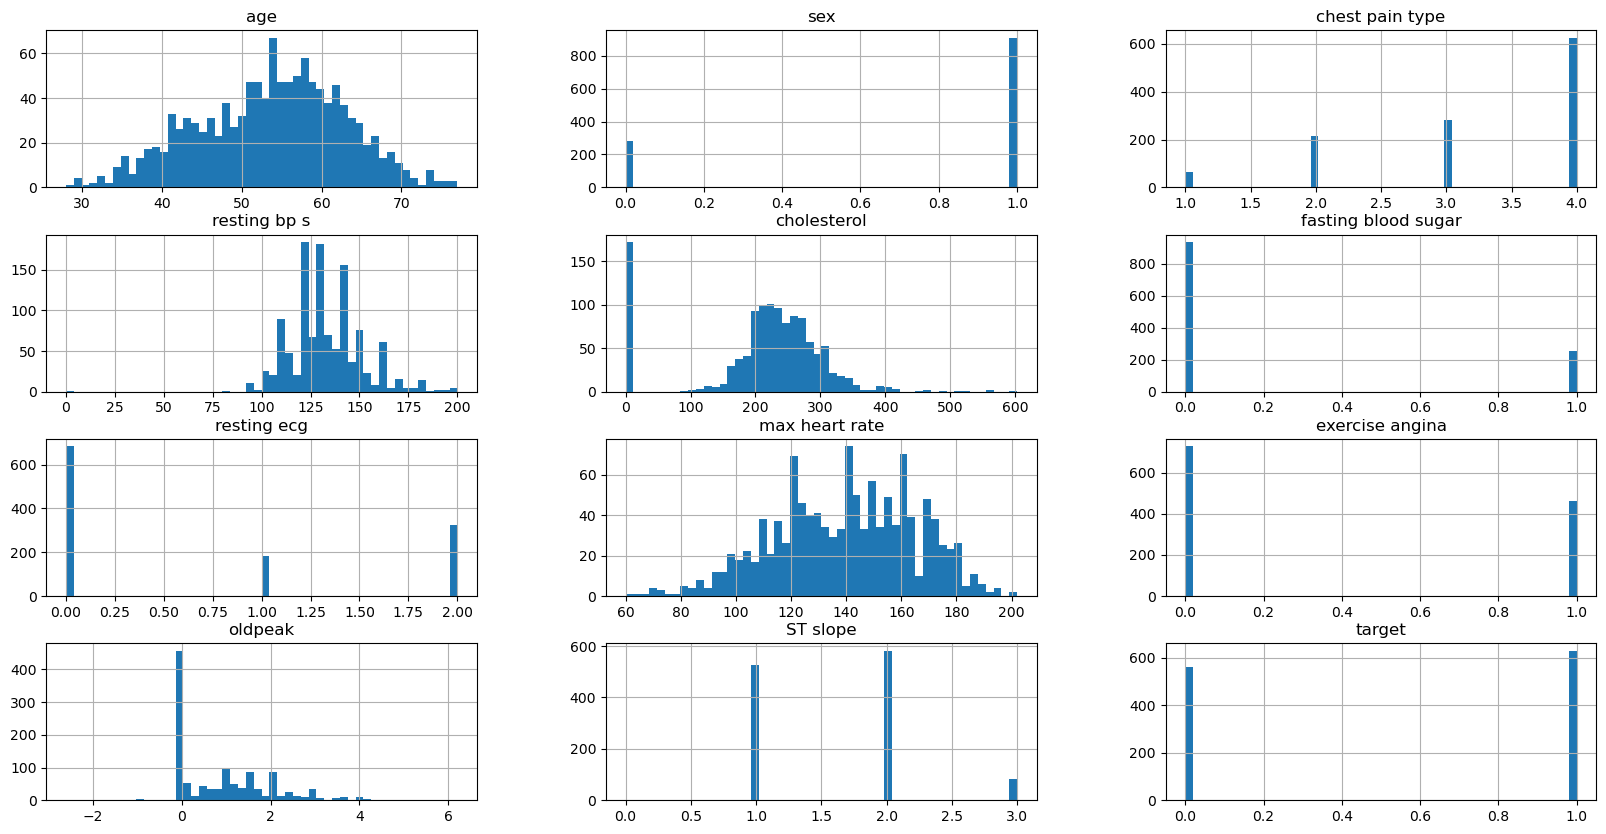

In [5]:
#Visualise data by using the histogram.
df.hist(figsize=(20,10),bins = 50)

For this data set, it appears that the distribution of ages has roughly bell-shaped average around 50-60 years. 

# 2.  Data correlation

In [6]:
#Summarise data correlation between features.
df.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


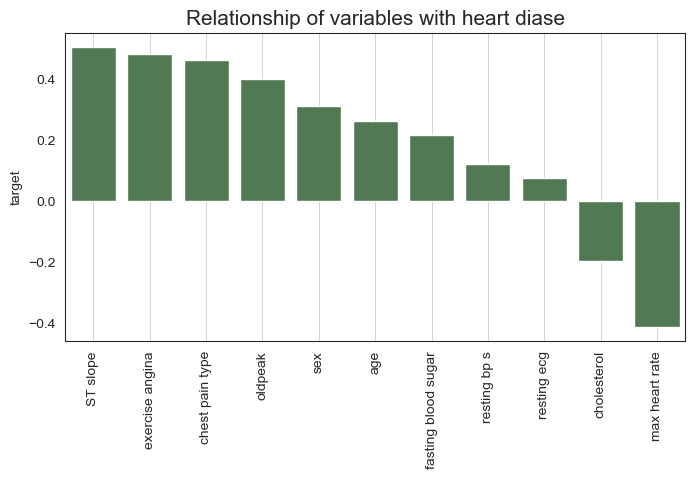

In [7]:
#Visualise all output from correlation table using barplot. 
disease_corr = df.corr()["target"]
df_diase_corr = disease_corr.drop("target", axis=0).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.set_style("white")
sns.barplot(x=df_diase_corr.index, y=df_diase_corr, color="#4a804d")
plt.xticks(rotation=90)
plt.grid(True, axis="x", lw=0.6)
plt.title("Relationship of variables with heart diase", fontsize=15)
plt.show()

This plot shows the correlations between various diseases and target variables, indicating that higher variance has a strong relationship.ST slop has the highest positive correlation in this graph whereas max heart rate has a negative correlation so it can be implied that during the exercise might be related to the lower risk of heart disease.  

#  3. Spilt data 

Data splitting in order to facilitate the training, testing, and evaluation of machine learning models: 
- Training data containing 80% of the entire data
- Testing data contianing 20% of the entire data.

In [7]:
train,test = train_test_split(df, test_size = 0.2, random_state = 142)

print(train.shape)
print(test.shape)

(952, 12)
(238, 12)


#  4. Train a linear regression.

This section will used the most valuable features from setion 2 predict with target to find MSE , RMSE and R-squared for linear regression model. Next, I will calculated the accuracy and explain model. 

In [8]:
#Select the most useful features from data set above to find the correlation in the next step.

X_train = train[['ST slope','exercise angina','age','cholesterol','max heart rate']]
y_train = train['target']

X_test = test[['ST slope','exercise angina','age','cholesterol','max heart rate']]
y_test = test['target']

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (952, 5)
y_train shape:  (952,)
x_test shape:  (238, 5)
y_test shape:  (238,)


In [10]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)
print("MSE:", mse) 
print("RMSE:", rmse) 
print("R Squared:", r2)

MSE: 0.16004297531662875
RMSE: 0.40005371553908703
R Squared: 0.3508432299437795


It can be found that MSE has a small value which suggesst better accuracy. Next, RMSE has provided the average error at 0.4005 means that moderate prediction error in the data set. Lastly, R-squared value implies the model has weak predictive to capturing some data but not all in the data set. 

# 5. Train a logistic regression. 

This section  will creating a logistic regression model to predict 'target' based on the other features then eveluate the accuracy from model again.

In [11]:
#Train a logistic regression model to predict 'target' based on the selected features (from the second step)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Predict on the training and testing data. 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [13]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8067226890756303
Test Accuracy: 0.7983193277310925


In [14]:
#RFE Techbique to support logistic answer
data = load_iris()
X = df[['cholesterol','ST slope','exercise angina','age','max heart rate']]
y = df['target']

In [15]:
model = LogisticRegression(max_iter=500)
rfe = RFE(estimator=model, n_features_to_select=2, step=1)
rfe = rfe.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

model = LogisticRegression(max_iter=500)
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=500), n_features_to_select=3)

In [16]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy of the model with RFE-selected features : %.4f\n' % accuracy)

Accuracy of the model with RFE-selected features : 0.7857



In this part it can be found that logistic regression provided better accuracy of test data set than RFE technique. (0.798 > 0.785)

# 6.  Train KNN model 

This section will split the dataset and train a KNN model to predict 'target' relies on other features. Next, will tunning to new K to find better result of accuracy. Lastly, will evaluate the accuracy of model.

In [17]:
# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=10)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [18]:
y_pred_train = clf_knn.predict(X_train)
accuracy_knn_model = accuracy_score(y_train, y_pred_train)
print('Training accuracy of KNN model is: ', accuracy_knn_model)

y_pred_test = clf_knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Testing accuracy of KNN model is: ', accuracy_test)


Training accuracy of KNN model is:  0.7563025210084033
Testing accuracy of KNN model is:  0.7058823529411765


In [19]:
from sklearn.model_selection import GridSearchCV
# Define a parameter grid for k
parameter_grid = {'n_neighbors': range(1,41)} 

# Create a GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), parameter_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 41)}, scoring='accuracy')

In [20]:
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print(f"The best value of K is {best_k} with a cross-validated accuracy of {best_score}")

The best value of K is 1 with a cross-validated accuracy of 0.7772916666666666


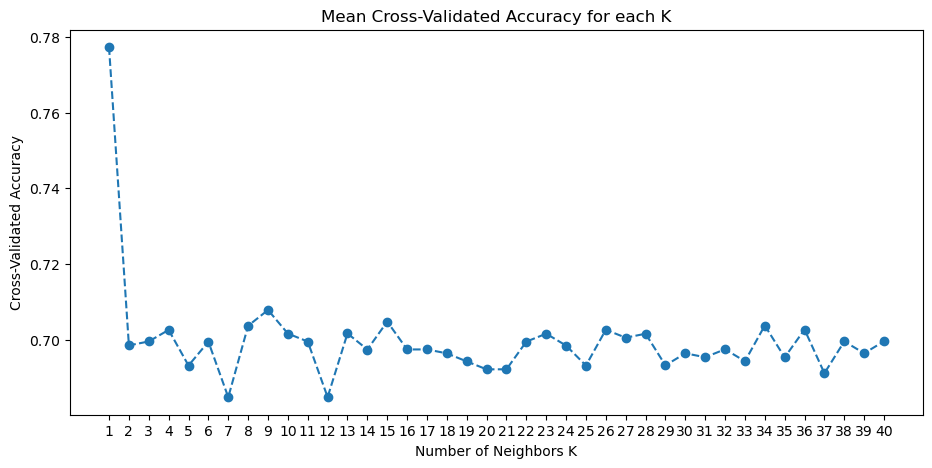

In [21]:
import matplotlib.pyplot as plt

mean_test_scores = grid_search.cv_results_['mean_test_score']
parameter_range = range(1, 41)  # Assuming the range for K is from 1 to 40

plt.figure(figsize=(11, 5))
plt.plot(parameter_range, mean_test_scores, marker='o', linestyle='--')
plt.title('Mean Cross-Validated Accuracy for each K')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(parameter_range)
plt.show()

In [22]:
clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train)
y_pred_train = clf_knn.predict(X_train)
accuracy_knn_model = accuracy_score(y_train, y_pred_train)
print('Training accuracy of KNN model is: ', accuracy_knn_model)

y_pred_test = clf_knn.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Testing accuracy of KNN model is: ', accuracy_test)

Training accuracy of KNN model is:  1.0
Testing accuracy of KNN model is:  0.7773109243697479


In this part the accuracy of KNN before start tunning k is 0.705 but after finish tunning has got a better result which is k =1 equal 0.777. However, the result of training is 1 which can assume that data might overfitting.

# 7. Training Navie Bay 

In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: %.4f\n' % accuracy)

Testing accuracy is: 0.8067



In [24]:
from sklearn.model_selection import cross_val_score

# Use 10-fold cross validation to show a more robust prediction accuracy
clf = GaussianNB()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores.min(), scores.max(), scores.mean(), scores.std()))

Gaussian Naive Bayes accuracy range: [0.7059, 0.9160]; mean: 0.7941; std: 0.0664



Using 10-fold cross-validation which data set spilt to ten parts, the accuracy is between 0.759 and 0.9160 and std is 0.664 so it can be implies that model has moderate variability across different data. 

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

clf = GaussianNB()
clf.fit(X_train, y_train)

y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print(f'Area Under the ROC Curve (AUC): {roc_auc:.4f}')

Area Under the ROC Curve (AUC): 0.8642


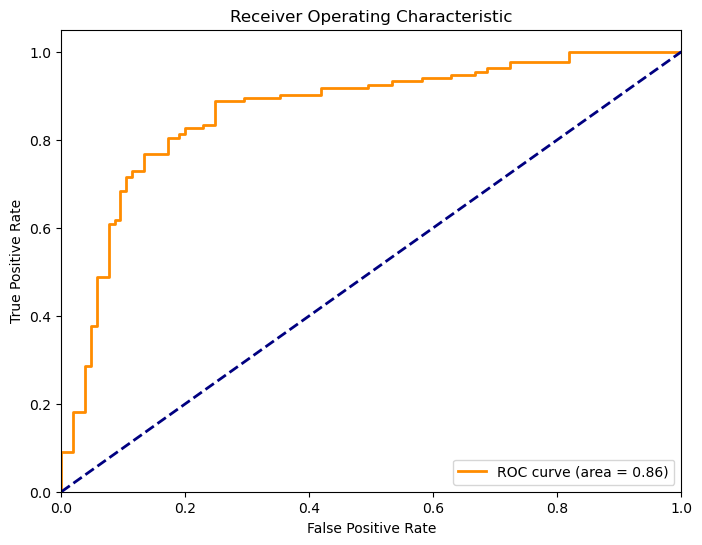

In [26]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

A higher AUC values is 0.86 indicates that a higher value get better predicting positive, which important in medical filed for diagnostics patient about heart-disease. 

# Summary

From this analysis it can be found many results for various methods and their performance will be explained as below: 

- Linear regression model
  MSE : 0.16 is the average of estimated values and actual value.
  RMSE : 0.40 represents the average of squared difference data between prediction and actual obeservation. 
  R-squared : 0.35 is the variability in the target variable in the model. 

- Logistic regression
  Training accuracy  : 0.806
  Test accuracy : 0.798
  It has a good result with a few over fitting data on between training and testing data. Suggesting that this model is quite strong in predicting heart disease status. 

- KNN 
  Training accuracy  : 1
  Test accuracy : 0.773
  This model is too closely fitting to training data and it gives poor performance to the test data. 
  
- Guassian Navie Bay
  Range: 0.706 to 0.916 mean: 0.7941; std: 0.0664
  This model has a little wild range of acuuracy and may be sensitive to specific data.
  
- Area under the ROC curve : 0.8642
  The higher values of the gaussian Naive Bayes model reinforces its reliability in predicting heart disease and confirming its utility in clinical decision-making.  

According to the result above, Logistic regression and Gaussian Naive Bayes seem to provide the most accurate and effctive result for heart disease dataset. Whereas KNN and Linear regression need adjustments to address overfitting data again.  